In [3]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from statistics import mean, median,variance,stdev
from scipy.stats import norm

In [4]:
# データをロード
def load_data(path):
    file_name = path + "x.txt"
    X = []
    file = open(file_name, 'r')
    for line in file.readlines():
        fname = line.rstrip().split(',') #using rstrip to remove the \n
        X.append(float(fname[1]))
    file.close()
    
    file_name = path + "y.txt"
    Y = []
    file = open(file_name, 'r')
    for line in file.readlines():
        fname = line.rstrip().split(',') #using rstrip to remove the \n
        Y.append(float(fname[1]))
    file.close()
    
    file_name = path + "z.txt"
    Z = []
    file = open(file_name, 'r')
    for line in file.readlines():
        fname = line.rstrip().split(',') #using rstrip to remove the \n
        Z.append(float(fname[1]))
    file.close()
    
    T = np.arange(0, len(X)*0.1, 0.1)
    
    return X, Y, Z, T

In [5]:
# 分布の違いを定量化

## Histogram Intersection ##
def HI(a, b,N=100):
    mini = min(min(a),min(b))
    maxi = max(max(a),max(b))
    a_hist, a_bins = np.histogram(a,bins=N,range=(mini,maxi),normed=True)
    b_hist, b_bins = np.histogram(b,bins=N,range=(mini,maxi),normed=True)
    HI = 0
    for i in range(0, N-1):
        HI = HI + min(a_hist[i], b_hist[i])
    return HI

## KLD(正規分布) ##
def KLD(a, b):
    a_mu = np.mean(a)
    a_sigma = np.std(a)
    b_mu = np.mean(b)
    b_sigma = np.std(b)
    
    return np.log(b_sigma / b_sigma) + (a_sigma*a_sigma + (a_mu - b_mu)*(a_mu - b_mu))/(2*b_sigma*b_sigma) - 1/2

## JSD(正規分布) ##
def JSD(a, b):
    m = np.array([a+b])/2
    return 0.5 * (KLD(a, m) + KLD(b, m))

## L1 norm ##
def L1Norm(a, b, N=100):
    mini = min(min(a),min(b))
    maxi = max(max(a),max(b))
    a_hist, a_bins = np.histogram(a,bins=N,range=(mini,maxi),normed=True)
    b_hist, b_bins = np.histogram(b,bins=N,range=(mini,maxi),normed=True)
    L1N = 0
    for i in range(0, N-1):
        L1N = L1N + abs(a_hist[i] - b_hist[i])
    return L1N

## L2 norm ##
def L2Norm(a, b, N=100):
    mini = min(min(a),min(b))
    maxi = max(max(a),max(b))
    a_hist, a_bins = np.histogram(a,bins=N,range=(mini,maxi),normed=True)
    b_hist, b_bins = np.histogram(b,bins=N,range=(mini,maxi),normed=True)
    L2N = 0
    for i in range(0, N-1):
        L2N = L2N + (a_hist[i] - b_hist[i]) * (a_hist[i] - b_hist[i])
    return L2N

In [31]:
# 表示して比較
def compaire_xyz(path1, path2):
    X1, Y1, Z1, T1 = load_data(path1)
    X2, Y2, Z2, T2 = load_data(path2)
    
    plt.figure(figsize=(20, 10), dpi=70)
    
    plt.subplot(231)
    plt.plot(X1,label=path1)
    plt.plot(X2,label=path2)
    plt.legend()
    plt.title("X")    
    
    plt.subplot(232)
    plt.plot(Y1,label=path1)
    plt.plot(Y2,label=path2)
    plt.legend()
    plt.title("Y")
    
    plt.subplot(233)
    plt.plot(Z1,label=path1)
    plt.plot(Z2,label=path2)
    plt.legend()
    plt.title("Z")
    
    plt.subplot(234)
    plt.hist(X1,alpha=0.5,label=path1)
    plt.hist(X2,alpha=0.5,label=path2)
    plt.legend()
    plt.title("X histogram ( KLD : " + str(KLD(X1,X2)) + " ) " )
    
    plt.subplot(235)
    plt.hist(Y1,alpha=0.5,label=path1)
    plt.hist(Y2,alpha=0.5,label=path2)
    plt.legend()
    plt.title("Y histogram ( KLD : " + str(KLD(Y1,Y2)) + " ) " )
    
    plt.subplot(236)
    plt.hist(Z1,alpha=0.5,label=path1)
    plt.hist(Z2,alpha=0.5,label=path2)
    plt.legend()
    plt.title("Z histogram ( KLD : " + str(KLD(Z1,Z2)) + " ) " )
    
    plt.tight_layout()

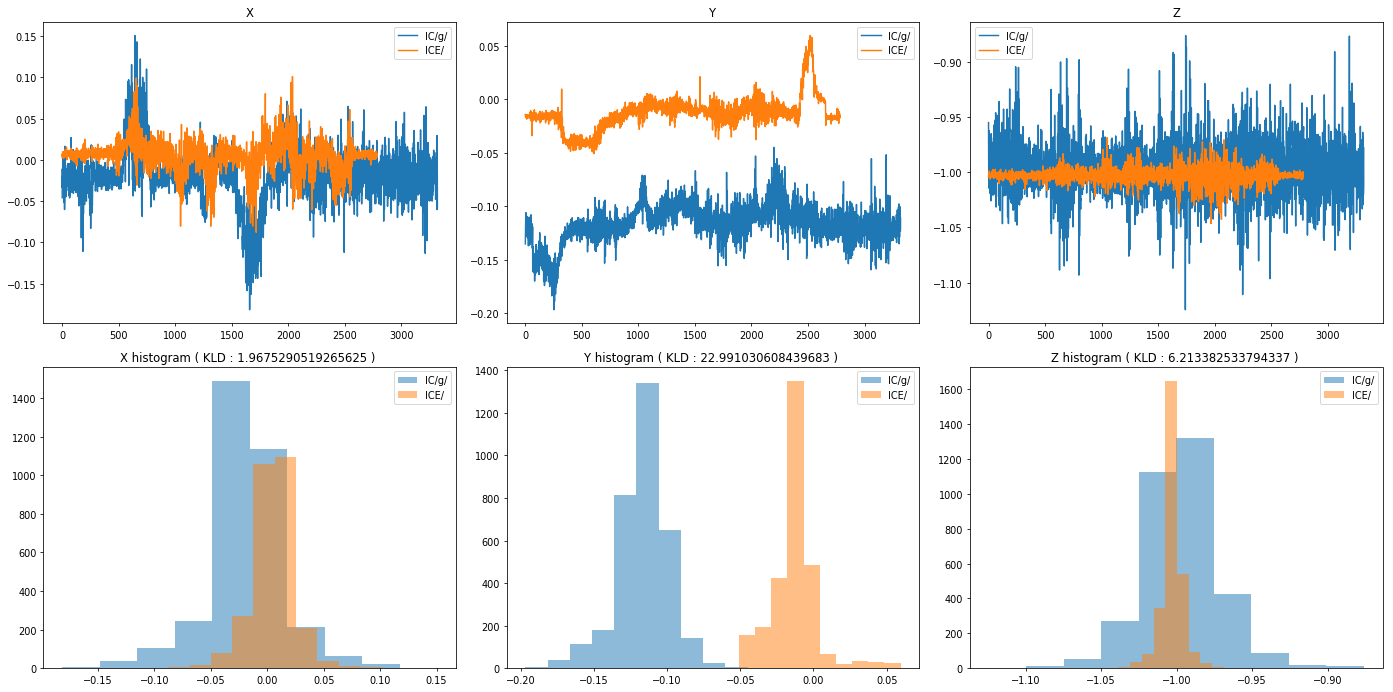

In [35]:
compaire_xyz("IC/g/", "ICE/")